In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from os import path
import itertools
import requests
from bs4 import BeautifulSoup
from matplotlib.ticker import ScalarFormatter, LogFormatter, LogFormatterExponent, LogFormatterMathtext

In [12]:
word = "peace"
URL = "http://projects.fivethirtyeight.com/reddit-ngram/?keyword={}&start=20071015&end=20150831&smoothing=10"
query = URL.format(word)
r = requests.get(query)
if r.ok:
    text = r.text
else:
    raise Exception("Failed to download the page")
    

In [20]:
soup = BeautifulSoup(text, 'html.parser')

In [25]:
links = soup.find_all(id="download-link")

In [39]:
link.get("href")

In [ ]:
def GetRedditViewerCSV(word):
   URL = "http://projects.fivethirtyeight.com/reddit-ngram/?keyword={}&start=20071015&end=20150831&smoothing=10"
   query = URL.format(word)
   

In [51]:
%matplotlib inline

In [52]:
from tools import FixedOrderFormatter

In [53]:
!ls data/Reddit/

biracial.csv         multicultural.csv    multiracial.csv
interracial.csv      multiculturalism.csv
monocultural.csv     multiethnic.csv


In [54]:
def load_reddit_database():
    df = pd.read_csv("data/Reddit/biracial.csv") 

    for file in glob.glob("data/Reddit/*csv"):
      filename = path.basename(file)
      if filename == "biracial.csv": continue
      new_column = pd.read_csv(file)
      print(filename)
      df = pd.merge(df, new_column, on="date", how="outer")
    df.set_index("date", inplace=True)
    df.set_index(pd.to_datetime(df.index), inplace=True)
    df  = df.resample('M', how='sum')
    return df

In [55]:
reddit = load_reddit_database()

interracial.csv
monocultural.csv
multicultural.csv
multiculturalism.csv
multiethnic.csv
multiracial.csv


In [56]:
reddit.head()

,biracial,interracial,monocultural,multicultural,multiculturalism,multiethnic,multiracial
date,,,,,,,
2007-10-31,0,0.000046,0,0,0.000036,0,0
2007-11-30,0,0.000000,0,0,0.000049,0,0
2007-12-31,0,0.000014,0,0,0.000032,0,0
2008-01-31,0,0.000000,0,0,0.000026,0,0
2008-02-29,0,0.000039,0,0,0.000037,0,0


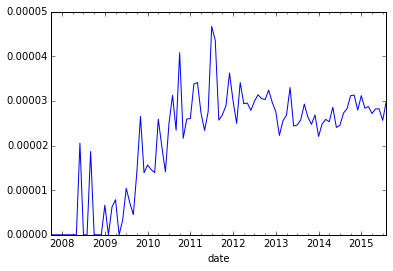

In [57]:
reddit.multicultural.plot(logy=False)

In [60]:
def plot(words):
    #markers = itertools.cycle(['s', 'D', '*', 'p', 'h', 'o', '+', 'd'])
    line_types = itertools.cycle(['-', '--', '-.'])
    df = reddit[words]
    df = pd.rolling_mean(df, 3)
    plt.figure(figsize=(16,6))

    for i,word in enumerate(words):
        plt.plot(df.index, df[word], next(line_types), linewidth=3,
                 color=str(i/float(len(words))))
    axis_1 = plt.gca()

    axis_1.set_yscale('log') # You can disable
    axis_1.set_ylim(ymin=1e-6) # You can disable
    axis_1.yaxis.set_major_formatter(LogFormatterMathtext())  # You can disable
    #axis_1.grid(True)

    font = {'family': "Times New Roman",
            'color': 'black',
           'size': 12}
    axis_1.set_ylabel("Percentage of N-Grams (%)", font)
    axis_1.set_xlabel("Year", font)
    #axis_1.yaxis.set_major_formatter(FixedOrderFormatter(-3)) # You can enable
    plt.legend(words, loc=2)

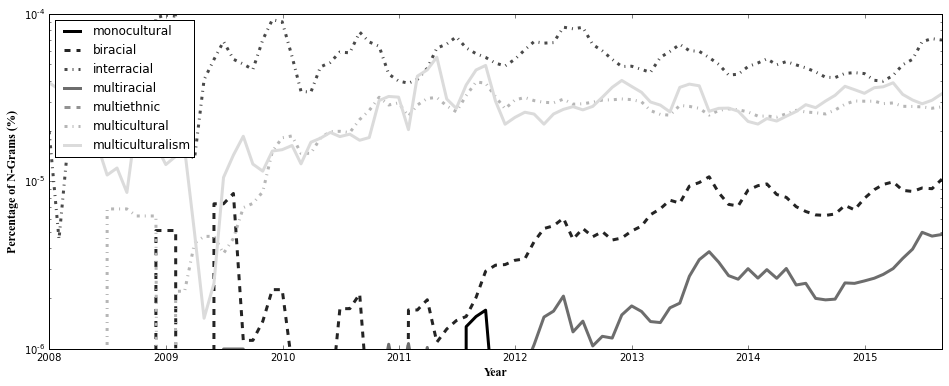

In [61]:
plot(["monocultural", "biracial", "interracial", "multiracial", "multiethnic", 
      "multicultural", "multiculturalism"])